# Naive Bayes

In [113]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit,learning_curve, validation_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [114]:
pickles_dir = 'C:/Users/andrea.foroni/Documents/myprojects/NLP/Pickles'

In [115]:
# Dataframe
path_df = pickles_dir+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pickles_dir+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pickles_dir+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pickles_dir+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pickles_dir+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

### Model fit

In [116]:
naive_bayes = MultinomialNB()
naive_bayes.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Model predict

In [117]:
naive_bayes_pred = naive_bayes.predict(features_test)

### Model

In [118]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, naive_bayes.predict(features_train)))

The training accuracy is: 
0.6776075857038658


In [119]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, naive_bayes_pred))

The test accuracy is: 
0.45454545454545453


In [120]:
# Classification report
print("Classification report")
print(classification_report(labels_test,naive_bayes_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.51      0.35      0.41        75
           2       0.00      0.00      0.00         1
           3       0.44      0.93      0.60        83
           4       0.41      0.14      0.21        50
           5       0.00      0.00      0.00        13

    accuracy                           0.45       242
   macro avg       0.23      0.24      0.20       242
weighted avg       0.39      0.45      0.38       242



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


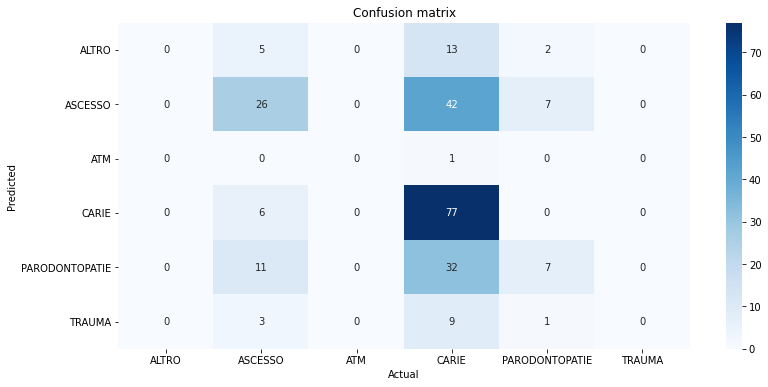

In [121]:
aux_df = df[['motivo_accesso', 'accesso_code']].drop_duplicates().sort_values('accesso_code')
conf_matrix = confusion_matrix(labels_test, naive_bayes_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='g',
            xticklabels=aux_df['motivo_accesso'].values, 
            yticklabels=aux_df['motivo_accesso'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [122]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes,
                                                       X=features_train,
                                                       y=labels_train,
                                                       cv= 3)

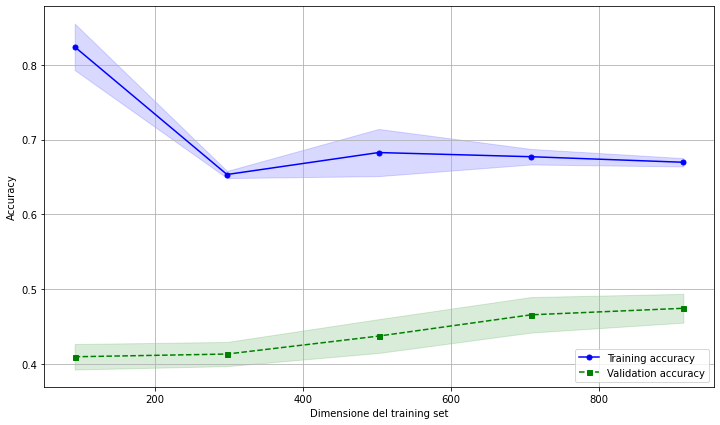

In [123]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')